### The Final Notebook for selecting sequences based from the Generations

In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

In [6]:
from utils import helper

In [4]:
root = '../..'
data_path = os.path.join(root, 'Data')

Loading the metadata and sequences

In [5]:
gen_records = helper.read_fasta(os.path.join(data_path, 'esm3_gen.fasta'))
meta_file = os.path.join(data_path, 'esm3_gen.metadata.json')
with open(meta_file) as f:
    gen_meta = json.load(f)
gen_meta = pd.DataFrame(gen_meta).T

In [8]:
meta_file = os.path.join(data_path, 'sequences_425.metadata.json')
with open(meta_file) as f:
    seq_425_meta = json.load(f)
seq_425_meta = pd.DataFrame(seq_425_meta).T

In [10]:
avg_perplexity = seq_425_meta['esm2_650M_perplexity'].mean()

In [11]:
avg_perplexity

3.538870011838184

This is the average perplexity of the given amylase sequences - used as a baseline

In [7]:
gen_meta

,esm2_650M_perplexity,seq_id,a_amylase_catalytic_hmm,a_amylase_all_beta_hmm,TM_score,plddt,p_activity
amylase_esm3_temp_0.5_gen_0,4.788739,0.338583,True,True,0.95211,0.79519,3.902871
amylase_esm3_temp_0.5_gen_1,4.410654,0.375405,True,True,0.97461,0.817851,3.853103
amylase_esm3_temp_0.5_gen_2,4.697809,0.351351,True,False,0.97635,0.829635,3.790203
amylase_esm3_temp_0.5_gen_3,4.722843,0.364366,True,True,0.97656,0.835836,4.570383
amylase_esm3_temp_0.5_gen_4,4.968064,0.351351,True,True,0.94746,0.807845,3.770248
...,...,...,...,...,...,...,...
amylase_esm3_temp_0.5_gen_195,5.188147,0.366559,True,False,0.95689,0.813117,3.226098
amylase_esm3_temp_0.5_gen_196,5.503539,0.36,True,False,0.9765,0.806274,4.003099
amylase_esm3_temp_0.5_gen_197,4.633389,0.375405,True,True,0.97457,0.835676,3.671358
amylase_esm3_temp_0.5_gen_198,4.783917,0.37987,True,False,0.95859,0.802287,4.379799


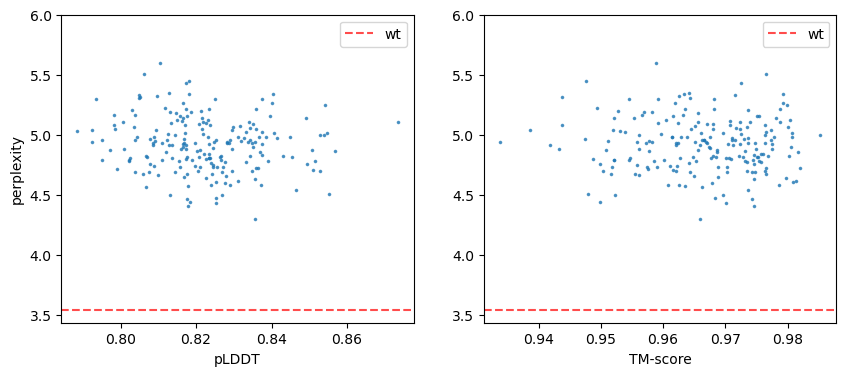

In [42]:
## pLDDT and TM scores vs Perplexity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

_ = ax[0].axhline(avg_perplexity, linestyle='--', color='red', label='wt', alpha=0.7)
_ = ax[1].axhline(avg_perplexity, linestyle='--', color='red', label='wt', alpha=0.7)

_ = ax[0].scatter(gen_meta['plddt'], gen_meta['esm2_650M_perplexity'], 
                    marker='.', alpha=0.7, s=10)
_ = ax[1].scatter(gen_meta['TM_score'], gen_meta['esm2_650M_perplexity'], 
                    marker='.', alpha=0.7, s=10)
    
_ = ax[0].set_xlabel('pLDDT')
_ = ax[0].set_ylabel('perplexity')
_ = ax[1].set_xlabel('TM-score')

_ = ax[0].set_ylim(top=6)
_ = ax[1].set_ylim(top=6)

_ = ax[0].legend(loc='upper right')
_ = ax[1].legend(loc='upper right')

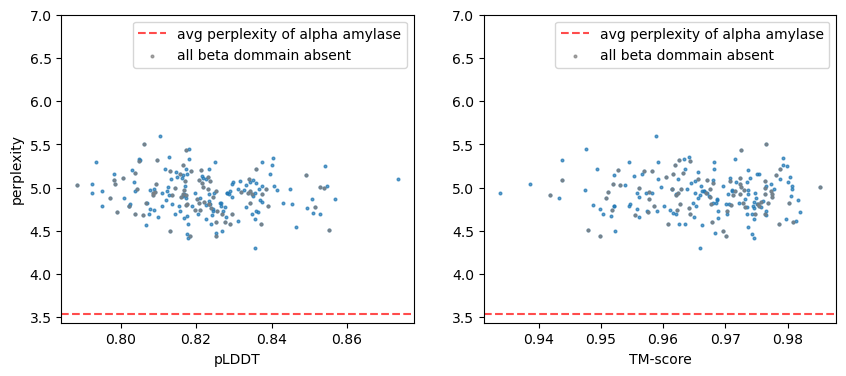

In [40]:
## pLDDT and TM scores vs Perplexity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

_ = ax[0].axhline(avg_perplexity, linestyle='--', color='red', label='avg perplexity of alpha amylase', alpha=0.7)
_ = ax[1].axhline(avg_perplexity, linestyle='--', color='red', label='avg perplexity of alpha amylase', alpha=0.7)

_ = ax[0].scatter(gen_meta['plddt'], gen_meta['esm2_650M_perplexity'], 
                    marker='.', alpha=0.7, s=15)
_ = ax[1].scatter(gen_meta['TM_score'], gen_meta['esm2_650M_perplexity'], 
                    marker='.', alpha=0.7, s=15)

mask = gen_meta['a_amylase_all_beta_hmm'] & gen_meta['a_amylase_catalytic_hmm']
_ = ax[0].scatter(gen_meta.loc[~mask, 'plddt'], gen_meta.loc[~mask, 'esm2_650M_perplexity'], 
                    marker='.', alpha=0.7, s=15, color='grey', label='all beta dommain absent')
_ = ax[1].scatter(gen_meta.loc[~mask, 'TM_score'], gen_meta.loc[~mask, 'esm2_650M_perplexity'], 
                    marker='.', alpha=0.7, s=15, color='grey', label='all beta dommain absent')
    
_ = ax[0].set_xlabel('pLDDT')
_ = ax[0].set_ylabel('perplexity')

_ = ax[1].set_xlabel('TM-score')

_ = ax[0].set_ylim(top=7)
_ = ax[1].set_ylim(top=7)

_ = ax[0].legend(loc='upper right')
_ = ax[1].legend(loc='upper right')

We want our sequences to be more towards the bottom right. \
What I find most interesting is that the perplexity of the given sequences is much lower than the generated ones. \
Maybe having a bigger pool of generated sequneces might give a better candidates. \
Finetuning on the given sequences or using some evolutionary information about amylases might help to select better candidates

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
gen_meta[['esm2_650M_perplexity_scaled', 'seq_id_scaled', 'p_activity_scaled']] = scaler.fit_transform(gen_meta[['esm2_650M_perplexity', 'seq_id', 'p_activity']])
gen_meta['a_amylase_all_beta_hmm_int'] = gen_meta['a_amylase_all_beta_hmm'].astype(int)

I select based on the combined score of the below metrics. \
I do this because I could find a single metric to trust  \
Ideally, if we have a better model to predict activity we can just use predicted acivity to get the new candidates

In [57]:
gen_meta['combined_score'] = (
    -gen_meta['esm2_650M_perplexity_scaled'] +    
    gen_meta['seq_id_scaled'] +                   
    gen_meta['p_activity_scaled'] +               
    gen_meta['a_amylase_all_beta_hmm_int']     
)

In [58]:
gen_meta

,esm2_650M_perplexity,seq_id,a_amylase_catalytic_hmm,a_amylase_all_beta_hmm,TM_score,plddt,p_activity,esm2_650M_perplexity_scaled,seq_id_scaled,p_activity_scaled,a_amylase_all_beta_hmm_int,combined_score
amylase_esm3_temp_0.5_gen_0,4.788739,0.338583,True,True,0.95211,0.79519,3.902871,0.377393,0.185928,0.475541,1,1.284076
amylase_esm3_temp_0.5_gen_1,4.410654,0.375405,True,True,0.97461,0.817851,3.853103,0.087761,0.732331,0.451712,1,2.096283
amylase_esm3_temp_0.5_gen_2,4.697809,0.351351,True,False,0.97635,0.829635,3.790203,0.307736,0.375404,0.421595,0,0.489264
amylase_esm3_temp_0.5_gen_3,4.722843,0.364366,True,True,0.97656,0.835836,4.570383,0.326913,0.568529,0.795147,1,2.036763
amylase_esm3_temp_0.5_gen_4,4.968064,0.351351,True,True,0.94746,0.807845,3.770248,0.514765,0.375404,0.412041,1,1.272680
...,...,...,...,...,...,...,...,...,...,...,...,...
amylase_esm3_temp_0.5_gen_195,5.188147,0.366559,True,False,0.95689,0.813117,3.226098,0.683360,0.601079,0.151501,0,0.069220
amylase_esm3_temp_0.5_gen_196,5.503539,0.36,True,False,0.9765,0.806274,4.003099,0.924967,0.503742,0.523531,0,0.102306
amylase_esm3_temp_0.5_gen_197,4.633389,0.375405,True,True,0.97457,0.835676,3.671358,0.258386,0.732331,0.364692,1,1.838637
amylase_esm3_temp_0.5_gen_198,4.783917,0.37987,True,False,0.95859,0.802287,4.379799,0.373699,0.798597,0.703895,0,1.128793


In [61]:
sorted_df = gen_meta.sort_values(by=['combined_score'], ascending=False)

In [68]:
top = 100

Text(0.5, 0, 'selected seq')

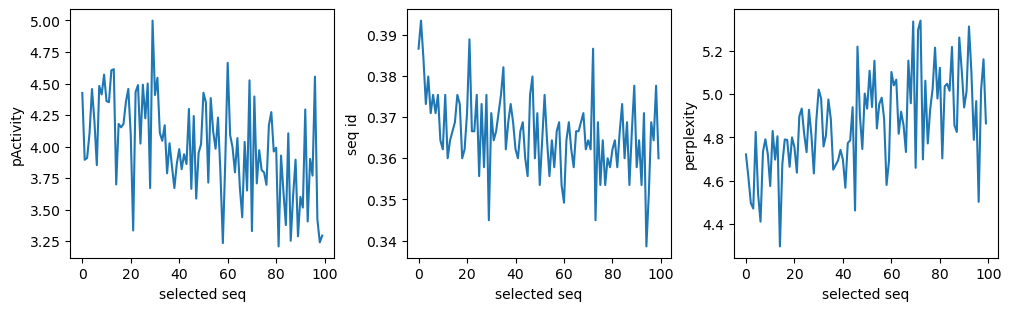

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='constrained')

ax[0].plot(sorted_df['p_activity'].to_numpy()[:top])
ax[1].plot(sorted_df['seq_id'].to_numpy()[:top])
ax[2].plot(sorted_df['esm2_650M_perplexity'].to_numpy()[:top])

ax[0].set_ylabel('pActivity')
ax[1].set_ylabel('seq id')
ax[2].set_ylabel('perplexity')

ax[0].set_xlabel('selected seq')
ax[1].set_xlabel('selected seq')
ax[2].set_xlabel('selected seq')

In [76]:
selected = list(sorted_df.index[:top])

In [79]:
lookup = {}
for rec in gen_records:
    lookup[rec.id] = str(rec.seq)

In [80]:
seq_dict = {}
for id in selected:
    seq_dict[id] = lookup[id]

In [81]:
# helper.create_fasta(seq_dict, os.path.join(data_path, 'selected_amylase.fasta'))